In [1]:
import os
import pandas as pd
from mpvis import mddrt

blasting_event_log_path = os.path.join("blasting_with_rework_event_log.csv")

# Read event log
blasting_event_log = pd.read_csv(blasting_event_log_path, sep=";")

# Key is the column format name of pm4py
# Value is the column name of the specific log and soon to be changed
# We will always need 3 columns for case, activity and timestamp
blasting_format = {
    "case:concept:name": "Case ID",
    "concept:name": "Activity",
    "time:timestamp": "Complete",
    "start_timestamp": "Start",
    "org:resource": "Resource",
    "cost:total": "Cost",
}

# Format event log 
blasting_event_log = mddrt.log_formatter(blasting_event_log, blasting_format)

In [2]:

# Discover of multi-dimensional DRT

drt = mddrt.discover_multi_dimensional_drt(
    blasting_event_log,
    calculate_cost=True,
    calculate_time=True,
    calculate_flexibility=True,
    calculate_quality=True,
    group_activities=False,
)

Calculating log mandatory activities: 


100%|██████████| 655/655 [00:00<00:00, 1501.84it/s]


Calculating log metrics: 


100%|██████████| 655/655 [00:00<00:00, 1079.46it/s]


In [3]:
# Discover of multi-dimensional DRT with automatic agroupation of activities

drt_grouped = mddrt.discover_multi_dimensional_drt(
    blasting_event_log,
    calculate_cost=True,
    calculate_time=True,
    calculate_flexibility=True,
    calculate_quality=True,
    group_activities=True,
)

Calculating log mandatory activities: 


100%|██████████| 655/655 [00:00<00:00, 1484.48it/s]


Calculating log metrics: 


100%|██████████| 655/655 [00:00<00:00, 956.32it/s] 


/Users/nicoabarca/ipre/ipre-mddrt/mddrt/.venv/lib/python3.9/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (132787694 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


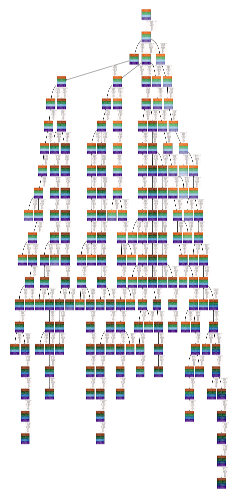

In [4]:
# Visualize the diagram of the multi-dimensional DRT

mddrt.view_multi_dimensional_drt(
    drt,
    visualize_cost=True,
    visualize_time=True,
    visualize_quality=True,
    visualize_flexibility=True
)

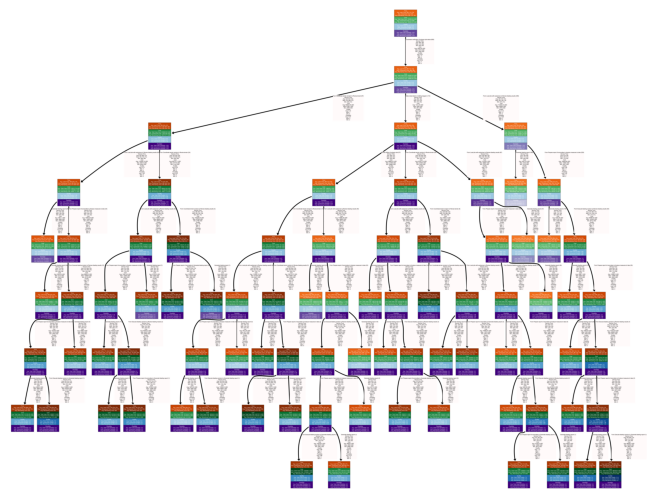

In [5]:
# Visualize the diagram of the grouped multi-dimensional DRT
mddrt.view_multi_dimensional_drt(
    drt_grouped,
    visualize_cost=True,
    visualize_time=True,
    visualize_quality=True,
    visualize_flexibility=True
)

In [7]:
# Save the diagram to file_name location with especified format

mddrt.save_vis_multi_dimensional_drt(
    drt,
    visualize_cost=True,
    visualize_time=True,
    visualize_flexibility=True,
    visualize_quality=True,
    file_path="blasting_process_diagram",
)